Loading the Dataset

In [ ]:
import pandas as pd

def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(' ::: ')
            if len(parts) == 4:
                movie_id, title, genre, plot = parts
                data.append([title, genre, plot])
    return pd.DataFrame(data, columns=['Title', 'Genre', 'Plot'])

train_df = load_data('/content/drive/MyDrive/DATASETS/Movie genre/train_data.txt')

train_df.head()


,Title,Genre,Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


Visualizing the Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

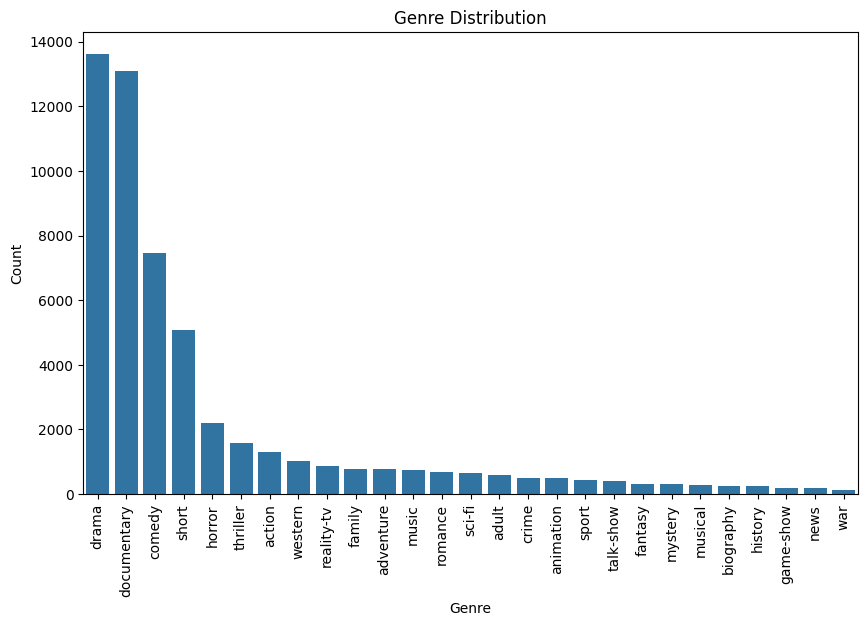

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=train_df , order=train_df['Genre'].value_counts().index )
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Model Selection

In [ ]:
from sklearn.model_selection import train_test_split

# Features (plot summaries) and labels (genres)
X = train_df['Plot']
y = train_df['Genre']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.describe()

,Plot
count,43371
unique,43289
top,Grammy - music award of the American academy o...
freq,10


Feature Engineering

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def text_preprocessing(text):

    text = text.lower()

    text = re.sub(r'\S*@\S*\s?', '', text)

    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'[^a-zA-Z]', ' ', text)

    text = "".join([char for char in text if char not in string.punctuation])

    words = word_tokenize(text)

    text = " ".join([word for word in words if word not in stop_words and len(word) > 2])

    text = re.sub(r'\s+', ' ', text).strip()
    return text

X_train = X_train.apply(text_preprocessing)
X_val = X_val.apply(text_preprocessing)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


Training and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_tfidf, y_train)

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Random forest model
rand_for_model = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=50)
rand_for_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(max_depth=50, n_estimators=150, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression predictions
log_reg_preds = log_reg_model.predict(X_val_tfidf)
log_reg_accuracy = accuracy_score(y_val, log_reg_preds)
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')

# Naive Bayes predictions
nb_preds = nb_model.predict(X_val_tfidf)
nb_accuracy = accuracy_score(y_val, nb_preds)
print(f'Naive Bayes Accuracy: {nb_accuracy}')

# Random Forest predictions
rand_for_preds = rand_for_model.predict(X_val_tfidf)
rand_for_accuracy = accuracy_score(y_val, rand_for_preds)
print(f'Random Forest Accuracy: {rand_for_accuracy}')


Logistic Regression Accuracy: 0.5764087429678133
Naive Bayes Accuracy: 0.5225491100249009
Random Forest Accuracy: 0.48113990593009315


In [ ]:
print('Logistic Regression Classification Report:')
print(classification_report(y_val, log_reg_preds))


Logistic Regression Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.53      0.26      0.35       263
       adult       0.71      0.22      0.34       112
   adventure       0.42      0.14      0.21       139
   animation       0.56      0.09      0.15       104
   biography       0.00      0.00      0.00        61
      comedy       0.50      0.58      0.54      1443
       crime       0.33      0.02      0.04       107
 documentary       0.66      0.84      0.74      2659
       drama       0.54      0.78      0.64      2697
      family       0.43      0.08      0.13       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.42      0.59        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.56      0.60       431
       music       0.61      0.47      0.53       144
     musical       1.00      0.02      0.04        50
     mystery       0.00      0.00      0.00        56
        news       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('Naive Bayes Classification Report:')
print(classification_report(y_val, nb_preds))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

      action       0.53      0.08      0.14       263
       adult       0.88      0.06      0.12       112
   adventure       0.47      0.05      0.09       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.50      0.43      0.46      1443
       crime       0.00      0.00      0.00       107
 documentary       0.58      0.88      0.70      2659
       drama       0.46      0.83      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.17      0.30        40
     history       0.00      0.00      0.00        45
      horror       0.72      0.36      0.48       431
       music       0.75      0.15      0.24       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('Random Forest Classification Report:')
print(classification_report(y_val, rand_for_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.00      0.00      0.00       263
       adult       1.00      0.09      0.16       112
   adventure       0.60      0.09      0.15       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.65      0.21      0.32      1443
       crime       0.00      0.00      0.00       107
 documentary       0.53      0.89      0.66      2659
       drama       0.41      0.85      0.56      2697
      family       0.00      0.00      0.00       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.86      0.30      0.44        40
     history       0.00      0.00      0.00        45
      horror       0.67      0.14      0.24       431
       music       0.76      0.09      0.16       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
        news       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


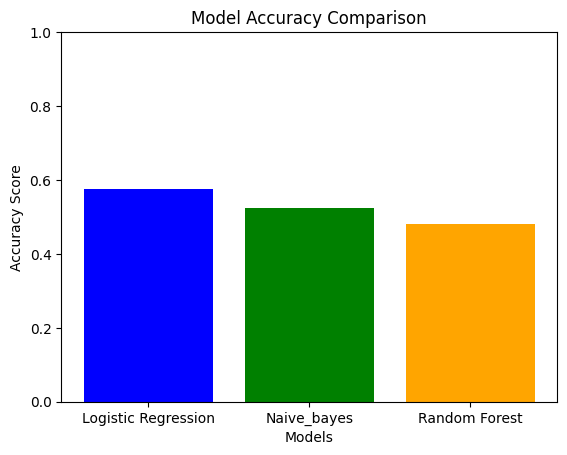

In [ ]:
models = ['Logistic Regression', 'Naive_bayes', 'Random Forest']
accuracy_scores = [log_reg_accuracy, nb_accuracy, rand_for_accuracy]

plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

plt.ylim(0, 1)
plt.show()


Clearly Logistic regression works the best so we will be using it for testing the model manually

In [ ]:
def preprocess_text(text):
    return text.lower()

# Function to predict genre from a movie description
def predict_genre(description, vectorizer, model):

    description = preprocess_text(description)

    description_vector = vectorizer.transform([description])

    predicted_genre = model.predict(description_vector)

    return predicted_genre[0]


Manual testing

In [ ]:
input_description = "A linguistics professor, Louise Banks (Amy Adams), leads a team to investigate 12 alien pods that have landed around the world. The military asks Banks to help translate the aliens' language to learn their purpose. Banks and scientist Ian Donnelly (Jeremy Renner) eventually discover a way to communicate with the aliens through writing. "
predicted_genre = predict_genre(input_description, tfidf_vectorizer, log_reg_model)
print(f"Predicted Genre: {predicted_genre}")

Predicted Genre: sci-fi


In [ ]:
input_description = "Ethan Hunt is framed for the murder of his IMF team during a mission in Prague. He must uncover the real traitor and clear his name."
predicted_genre = predict_genre(input_description, tfidf_vectorizer, log_reg_model)
print(f"Predicted Genre: {predicted_genre}")

Predicted Genre: action
